In [ ]:
#Week 3

In [ ]:
#Multivariate Categorical data

In [6]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("nhanes_2015_2016.csv")

In [12]:
df.head(10)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


In [14]:
df.dtypes

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

In [22]:
#Selecting columns in python

In [24]:
keep = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [34]:
#Another way of selecting columns 
keep2 = [column for column in df.columns if 'BMX' in column]
print(keep2)
keep3 = [column for column in df.columns if column.startswith("BMX")]
print(keep3)

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']
['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']


In [38]:
df_BMX = df[keep]
df_BMX2 = df.loc[:, keep]

In [40]:
df_BMX.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


In [42]:
#We can also check whether the two df BMX and BMX2 are equal or not.
pd.testing.assert_frame_equal(df_BMX, df_BMX)

In [46]:
waist_median = pd.Series.median(df_BMX['BMXWAIST'])
waist_median

98.3

In [60]:
df_BMX2 = df_BMX[df_BMX['BMXWAIST'] > waist_median]
print(df_BMX2.shape)
print(df_BMX.shape)
df_BMX2.head()

(2677, 7)
(5735, 7)


,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
9,108.3,179.4,33.6,46.0,44.1,38.5,116.0


In [72]:
df_BMX3 = df_BMX[df_BMX['BMXLEG'] < 32]
df_BMX4 = df_BMX[(df_BMX['BMXLEG'] < 32) & (df_BMX['BMXWAIST'] > waist_median)]
print(df_BMX4.shape)
df_BMX4.head()

(163, 7)


,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [74]:
#Another way to use this is using query method

In [78]:
df_BMX3 = df_BMX.query('BMXWAIST > @waist_median & BMXLEG < 32')
df_BMX3.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

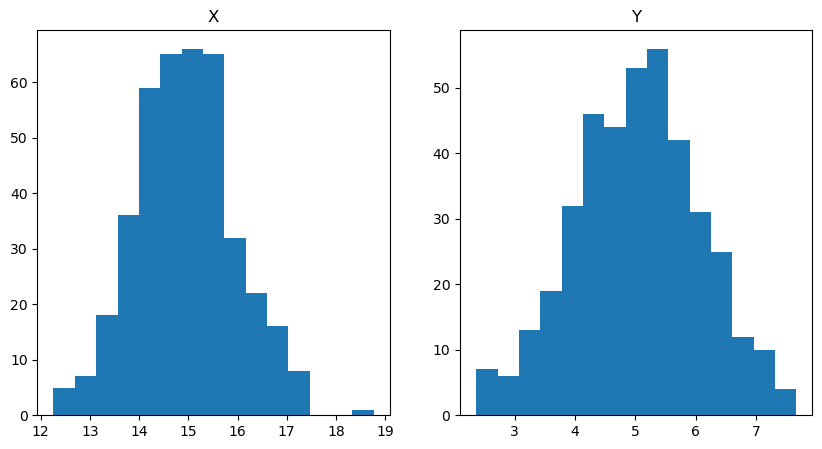

In [34]:
r = 0.5
mean = [15, 5]
cov = [[1, r], [r, 1]]
x, y = np.random.multivariate_normal(mean, cov, 400).T
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = x, bins = 15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x = y, bins = 15)
plt.title("Y")

plt.show()

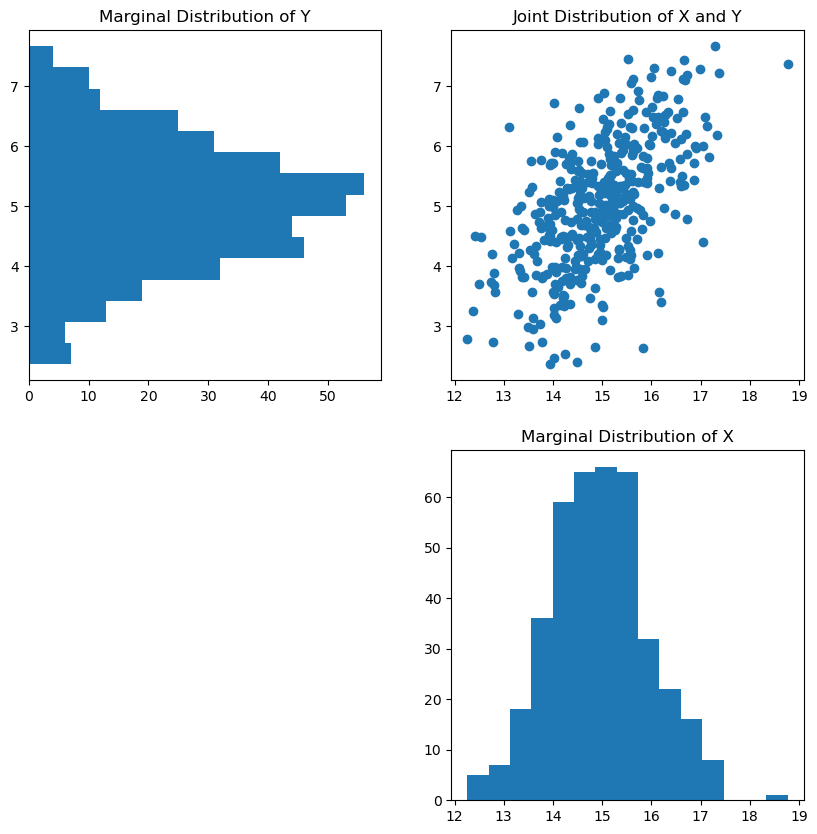

In [36]:
# Plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")

# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

# Show the plots
plt.show()

In [38]:
#Testing and reproducibility for statistical code

In [40]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [48]:
assert 3 == 1+2 #assert function if incorrect shows error in code
assert np.max([2, 5, 3]) == 5

In [50]:
#Checking whether sample standard deviation is 1 or not; rtol and atol - relative and absolute tolerance;
np.random.seed(123)
assert np.allclose(np.random.normal(size=1000).std(), 1,  rtol=1e-2, atol = 1e-2)

#Poisson distribution 
np.random.seed(123)
x = np.random.poisson (2, size = 100000)
assert np.allclose(x.mean(), x.var(), rtol=1e-2, atol = 1e-2)


In [54]:
#Download NHANES 2015-16 data
df = pd.read_csv("nhanes_2015_2016.csv")
#After loading the data, we may wish to confirm that the sequence variable SEQN 
#(which is supposed to be a unique identifier for each subject) is never missing. 

assert pd.notnull(df["SEQN"]).all()
assert len(df["SEQN"].unique()) == df.shape[0]
assert df["RIDAGEYR"].max() <= 80
assert (pd.notnull(df["ALQ101"]) | pd.isnull(df["ALQ110"])).all()
assert all([np.issubdtype(x, np.number) for x in df.dtypes])

In [56]:
#Analysis of multivariate variables

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
da = pd.read_csv("nhanes_2015_2016.csv")

<Axes: xlabel='BMXLEG', ylabel='BMXARML'>

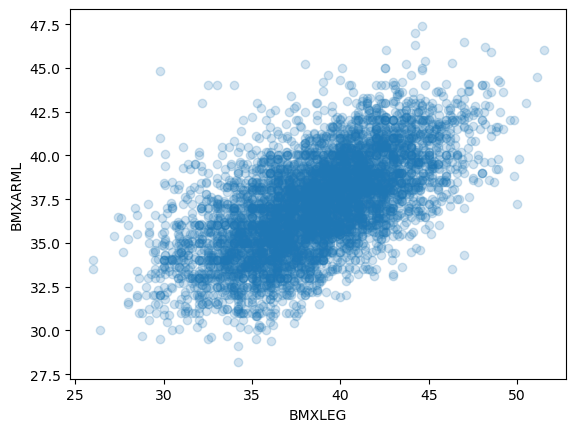

In [68]:
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg=False, scatter_kws={"alpha":0.2})
#fit_reg=False disables the regression line 
#scatter_kws makes the points semi-transparent 

In [70]:
#Another way to present overplotting is to make a plot of density of points 

Text(0.1, 0.9, 'r=0.62')

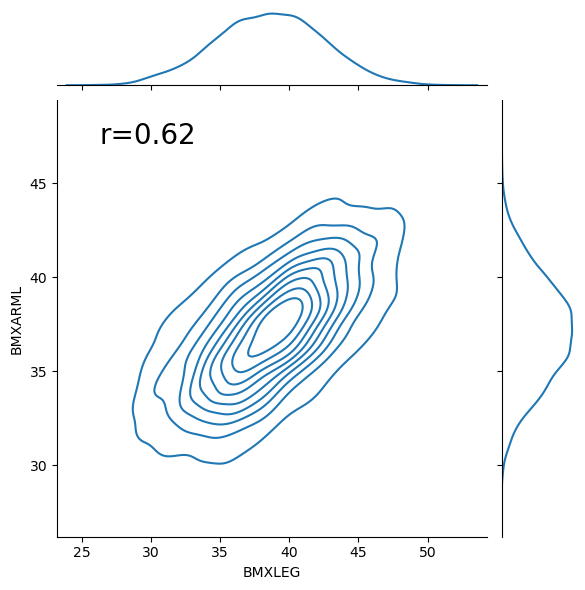

In [74]:
p = sns.jointplot(x="BMXLEG", y="BMXARML", kind="kde", data=da) #kde = specifies a kde(kernel distribution estimation) instead of a default scatterplot
r = da[["BMXLEG", "BMXARML"]].corr().iloc[0, 1] #calculate pearson correlation
p.ax_joint.annotate("r=%.2f" % r, xy=(0.1, 0.9), xycoords="axes fraction", size = 20) #annotate - puts text inside the graph 

Text(0.1, 0.9, 'r=0.62')

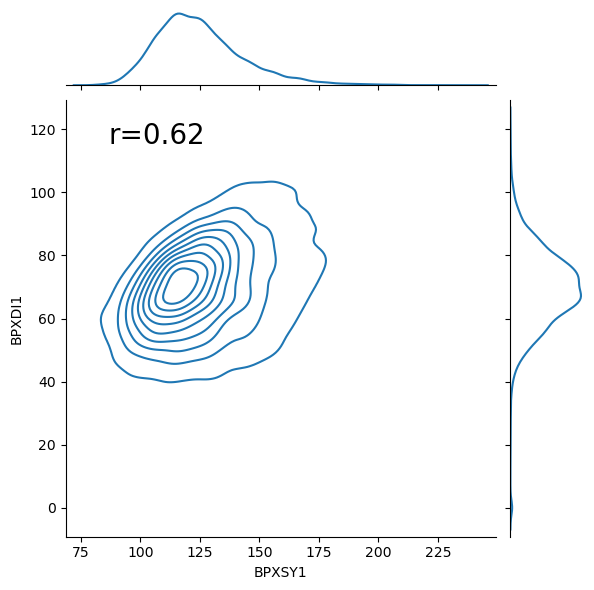

In [78]:
q = sns.jointplot(x="BPXSY1", y="BPXDI1", kind="kde", data=da)
j = da[["BPXSY1", "BPXDI1"]].corr().iloc[0, 1]
q.ax_joint.annotate("r=%.2f" % r, xy = (0.1, 0.9), xycoords = "axes fraction", size = 20)

Text(0.1, 0.9, 'r=0.88')

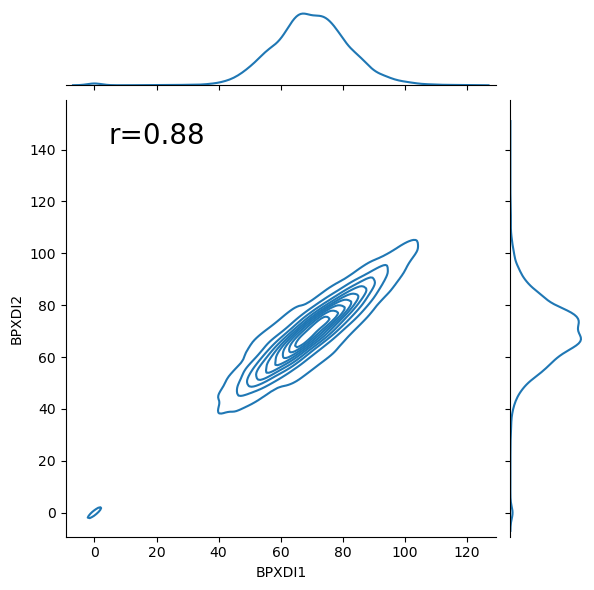

In [84]:
p = sns.jointplot( x="BPXDI1", y="BPXDI2", kind="kde", data=da)
r = da[["BPXDI1", "BPXDI2"]].corr().iloc[1, 0]
p.ax_joint.annotate("r=%.2f" % r, xy = (0.1, 0.9), xycoords = "axes fraction", size=20)

Heterogenity and stratification

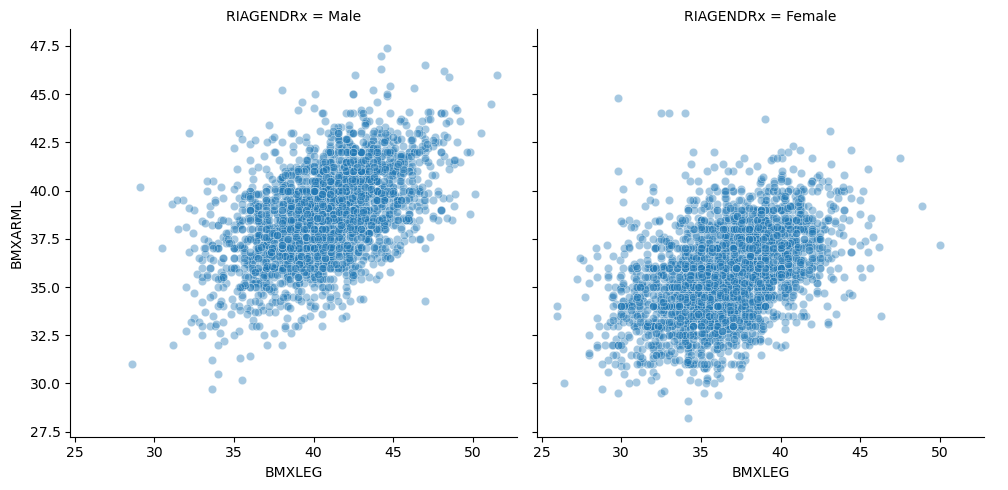

In [91]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
sns.FacetGrid(da, col="RIAGENDRx", height = 5).map(sns.scatterplot, "BMXLEG", "BMXARML", alpha = 0.4).add_legend();

In [95]:
print(da.loc[da.RIAGENDRx == "Female", ["BMXLEG", "BMXARML"]].corr())
print(da.loc[da.RIAGENDRx == "Male", ["BMXLEG", "BMXARML"]].corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


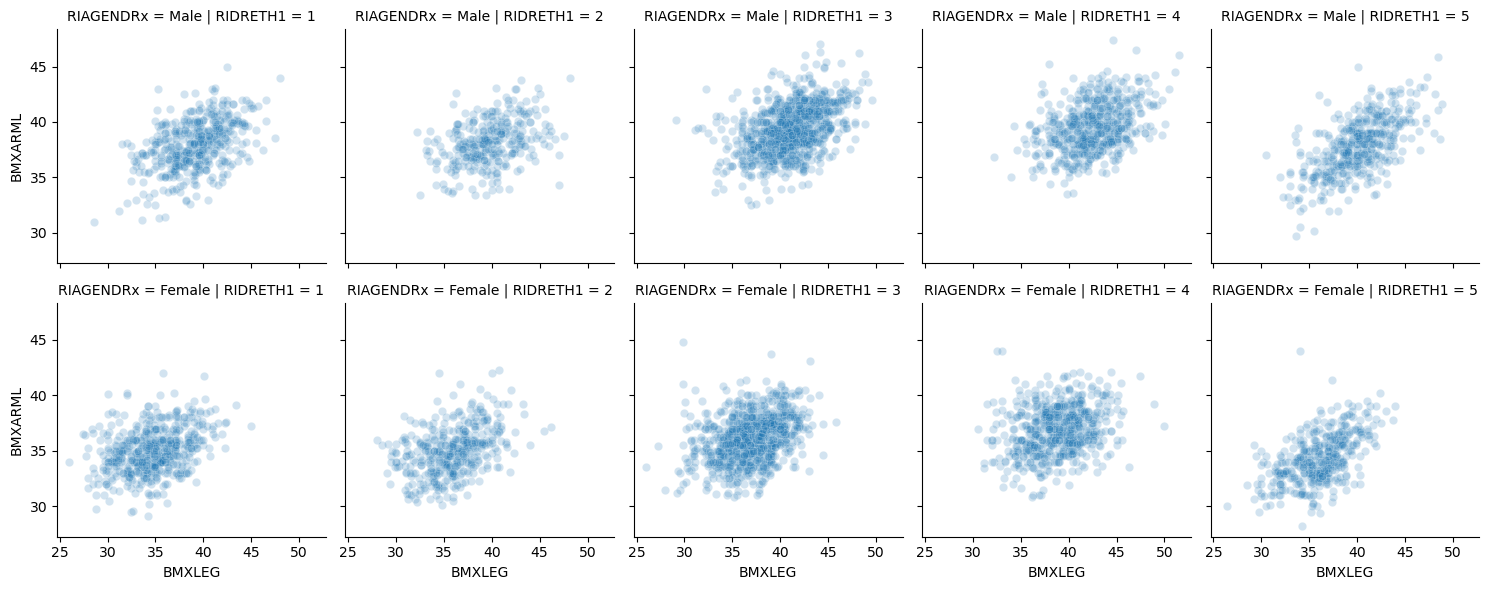

In [99]:
sns.FacetGrid(da, col = "RIDRETH1", row="RIAGENDRx").map(sns.scatterplot, "BMXLEG", "BMXARML", alpha= 0.2).add_legend()

In [101]:
#Categorical bivariate data
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1:"<9", 2:"9-11", 3:"HS/GED", 4:"Some college/AA", 5:"College", 7:"Refused", 9:"Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living w/partner", 77:"Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") &  (da.DMDMARTLx != "Refused"), :]

In [103]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [111]:
x.apply(lambda z: z/z.sum(), axis = 1) #axis-1 means normalizing within rows

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [109]:
x.apply(lambda z: z/z.sum(), axis = 0) #axis-0 means normalizing within columns

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


In [113]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row

In [115]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x:x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [117]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


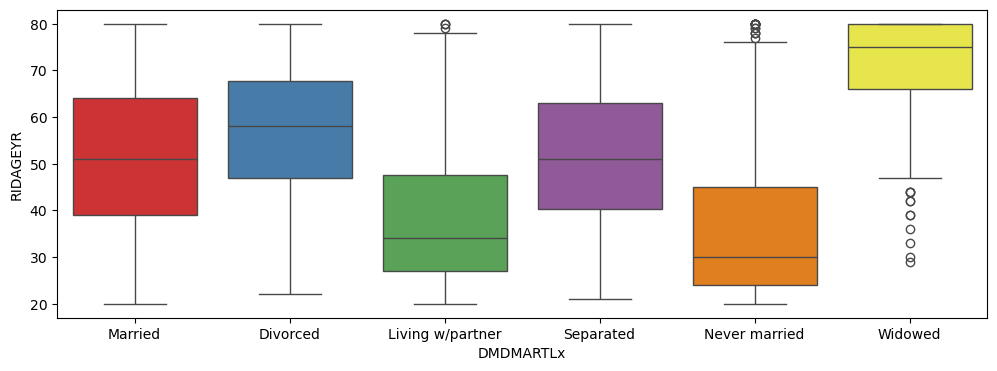

In [133]:
plt.figure(figsize = (12,4))
a = sns.boxplot(x=db.DMDMARTLx, y=db.RIDAGEYR, hue=db.DMDMARTLx, legend=False, palette="Set1")

<Axes: xlabel='DMDMARTLx', ylabel='RIDAGEYR'>

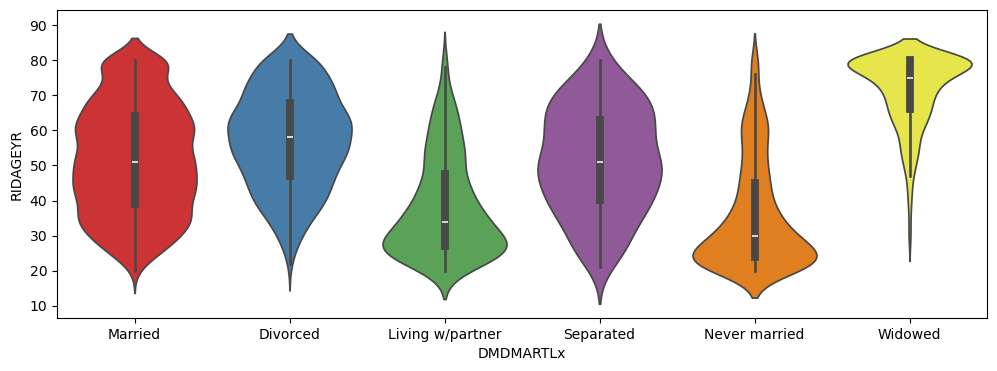

In [149]:
plt.figure(figsize = (12,4))
sns.violinplot(x = db.DMDMARTLx, y=db.RIDAGEYR, hue=db.DMDMARTLx, legend=False, palette ="Set1")


<Axes: xlabel='DMDMARTLx', ylabel='RIDAGEYR'>

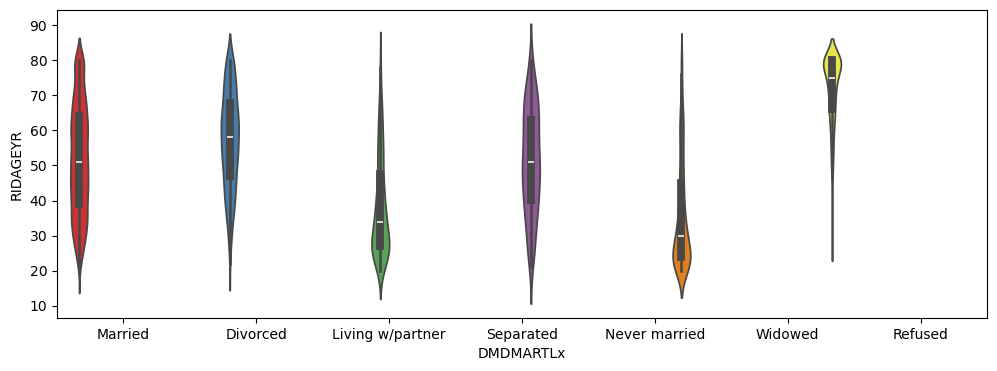

In [151]:
plt.figure(figsize = (12,4))
sns.violinplot(x = da.DMDMARTLx, y=da.RIDAGEYR, hue=db.DMDMARTLx, legend=False, palette ="Set1")


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

da=pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000
          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


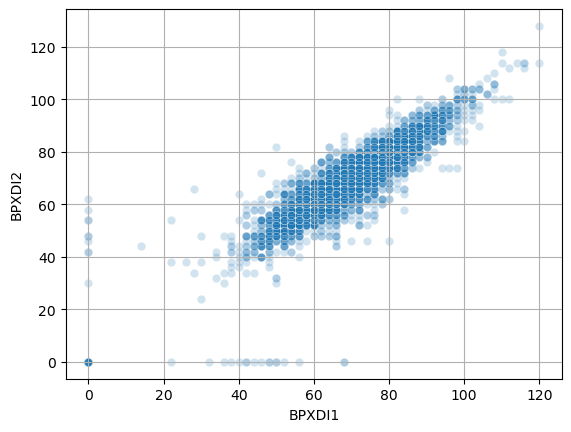

In [155]:
plt.grid(True)
sns.scatterplot(x="BPXDI1", y="BPXDI2", data=da, alpha=0.2)
print(da[["BPXDI1", "BPXDI2"]].corr())
print(da[["BPXSY1", "BPXSY2"]].corr())

In [157]:
print(da[["BPXSY1", "BPXDI1"]].corr())
print(da[["BPXSY2", "BPXDI2"]].corr())

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000
          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


                            BPXSY1    BPXDI1
RIAGENDR RIDRETH1                           
1        1        BPXSY1  1.000000  0.302742
                  BPXDI1  0.302742  1.000000
         2        BPXSY1  1.000000  0.306427
                  BPXDI1  0.306427  1.000000
         3        BPXSY1  1.000000  0.207470
                  BPXDI1  0.207470  1.000000
         4        BPXSY1  1.000000  0.423597
                  BPXDI1  0.423597  1.000000
         5        BPXSY1  1.000000  0.370852
                  BPXDI1  0.370852  1.000000
2        1        BPXSY1  1.000000  0.351912
                  BPXDI1  0.351912  1.000000
         2        BPXSY1  1.000000  0.239737
                  BPXDI1  0.239737  1.000000
         3        BPXSY1  1.000000  0.241947
                  BPXDI1  0.241947  1.000000
         4        BPXSY1  1.000000  0.378335
                  BPXDI1  0.378335  1.000000
         5        BPXSY1  1.000000  0.438976
                  BPXDI1  0.438976  1.000000


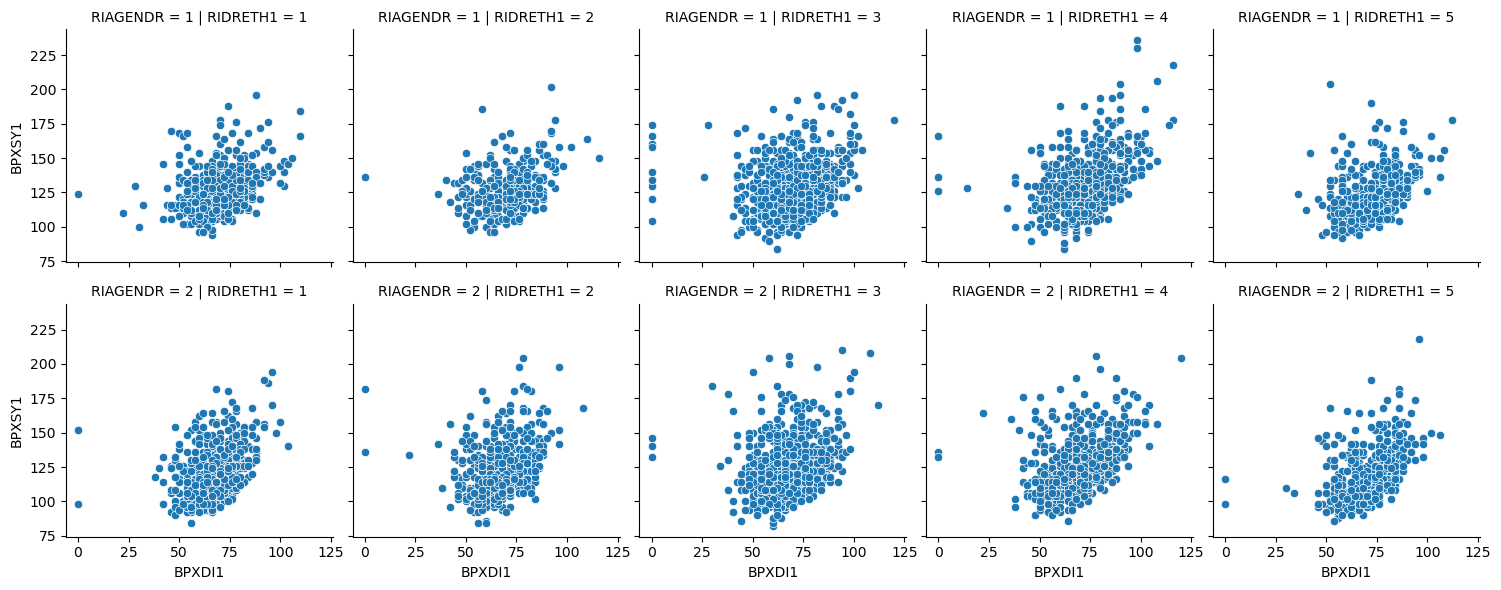

In [159]:
print(da.groupby(["RIAGENDR", "RIDRETH1"])[["BPXSY1", "BPXDI1"]].corr())
g = sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDR")
g.map(sns.scatterplot, "BPXDI1", "BPXSY1")

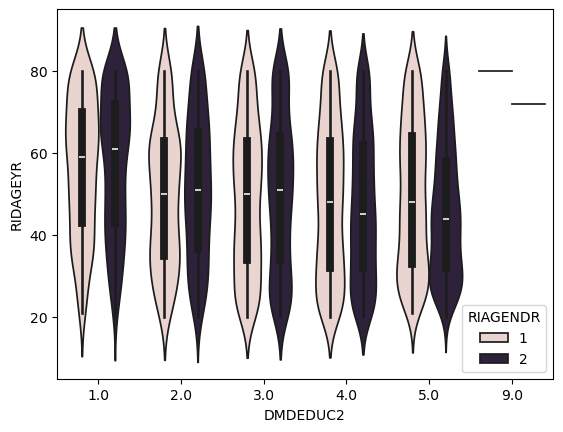

In [161]:
sns.violinplot(data=da, y="RIDAGEYR", x="DMDEDUC2", hue="RIAGENDR");

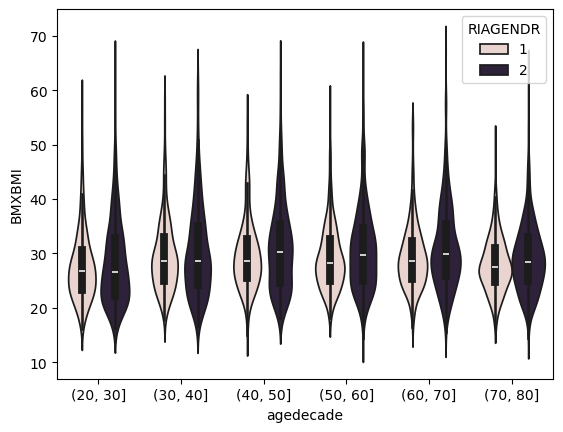

In [163]:
da["agedecade"] = pd.cut(da["RIDAGEYR"], range(20, 90, 10))
sns.violinplot(data=da, y="BMXBMI", x="agedecade", hue="RIAGENDR");

In [165]:
c = da.groupby(["RIDRETH1", "HIQ210"]).size().unstack()
print(c.divide(c.sum(1), axis=0))

HIQ210         1.0       2.0       9.0
RIDRETH1                              
1         0.137982  0.857567  0.004451
2         0.128696  0.871304       NaN
3         0.067354  0.931432  0.001214
4         0.108654  0.890385  0.000962
5         0.081761  0.915723  0.002516
